## Shrodinger Coin


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = {
    'Asset': ['Stocks', 'Bonds', 'Gold', 'Silver'],
    'Market Cap (Trillion USD)': [95, 105, 11, 1.4],
    'Monetary Premium Percentage': [0.2, 0.2, 0.8, 0.5],
    'Probability of Capture': [0.1, 0.1, 0.5, 0.5],
    'Time to Capture (Years)': [10, 10, 10, 10],
}

discount_rate = 0.05

df = pd.DataFrame(data)
df



,Asset,Market Cap (Trillion USD),Monetary Premium Percentage,Probability of Capture,Time to Capture (Years)
0,Stocks,95.0,0.2,0.1,10
1,Bonds,105.0,0.2,0.1,10
2,Gold,11.0,0.8,0.5,10
3,Silver,1.4,0.5,0.5,10


In [3]:
def calculate_expected_capture_value(asset_market_cap, monetization_percentage, probability_of_capture, time_to_capture, discount_rate):
    return (asset_market_cap * monetization_percentage * probability_of_capture) / ((1 + discount_rate) ** time_to_capture)


In [4]:
df['Expected Capture Value (Trillion USD)'] = df.apply(lambda row: calculate_expected_capture_value(row['Market Cap (Trillion USD)'], row['Monetary Premium Percentage'], row['Probability of Capture'], row['Time to Capture (Years)'], discount_rate), axis=1)
df


,Asset,Market Cap (Trillion USD),Monetary Premium Percentage,Probability of Capture,Time to Capture (Years),Expected Capture Value (Trillion USD)
0,Stocks,95.0,0.2,0.1,10,1.166435
1,Bonds,105.0,0.2,0.1,10,1.289218
2,Gold,11.0,0.8,0.5,10,2.701218
3,Silver,1.4,0.5,0.5,10,0.214870


In [5]:
bitcoin_fair_value_today = df['Expected Capture Value (Trillion USD)'].sum() * 1e12 / 21e6
bitcoin_fair_value_today


255797.18897531633

In [6]:
def project_fair_value_over_time(df, discount_rate, time_horizon):
    years = np.arange(0, time_horizon + 1)
    projected_values = []

    for year in years:
        df['Temp Capture Value'] = df.apply(lambda row: calculate_expected_capture_value(row['Market Cap (Trillion USD)'], row['Monetary Premium Percentage'], row['Probability of Capture'], row['Time to Capture (Years)'] - year, discount_rate), axis=1)
        projected_value = df['Temp Capture Value'].sum() * 1e12 / 21e6
        projected_values.append(projected_value)

    return years, projected_values


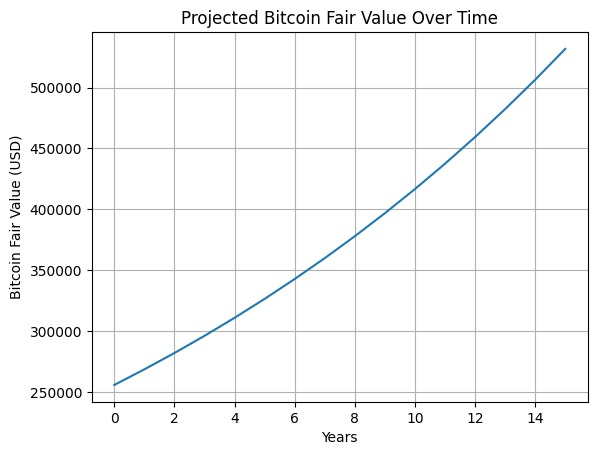

In [7]:
time_horizon = 15
years, projected_values = project_fair_value_over_time(df, discount_rate, time_horizon)

plt.plot(years, projected_values)
plt.xlabel('Years')
plt.ylabel('Bitcoin Fair Value (USD)')
plt.title('Projected Bitcoin Fair Value Over Time')
plt.grid()
plt.show()
